<a href="https://colab.research.google.com/github/S10859051/bigdata/blob/main/0323.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
install.packages("ggplot2")
install.packages("SportsAnalytics")
library(SportsAnalytics)
library(ggplot2)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



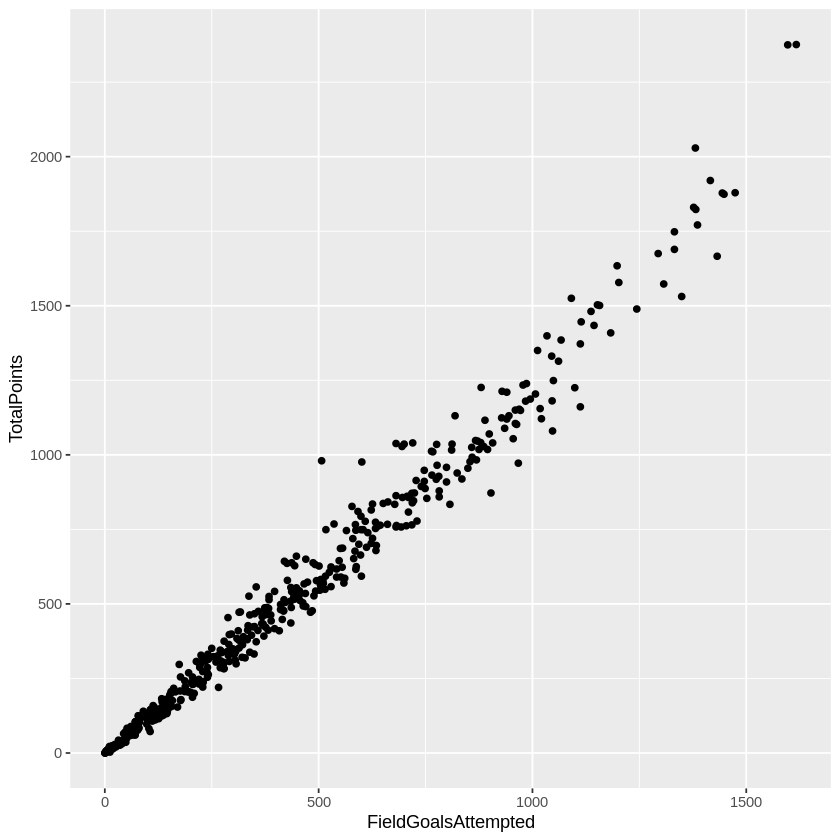

In [27]:
NBA1516<-fetch_NBAPlayerStatistics("15-16")
qplot(FieldGoalsAttempted, TotalPoints, data = NBA1516)

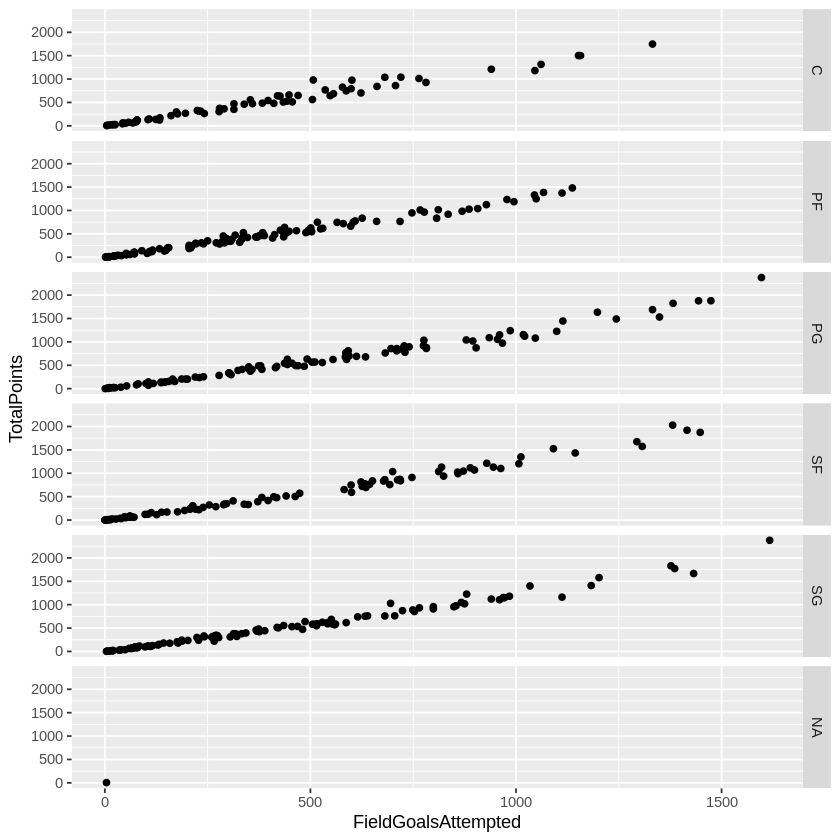

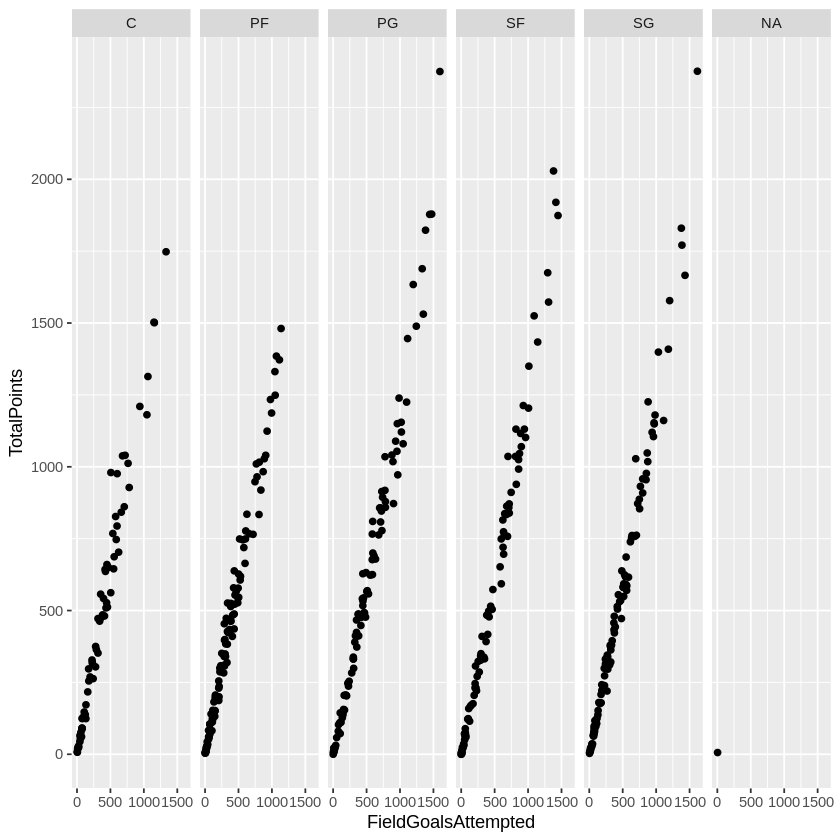

In [26]:
qplot(FieldGoalsAttempted, TotalPoints, data = NBA1516, facets = Position ~ .)
qplot(FieldGoalsAttempted, TotalPoints, data = NBA1516, facets = .~Position)

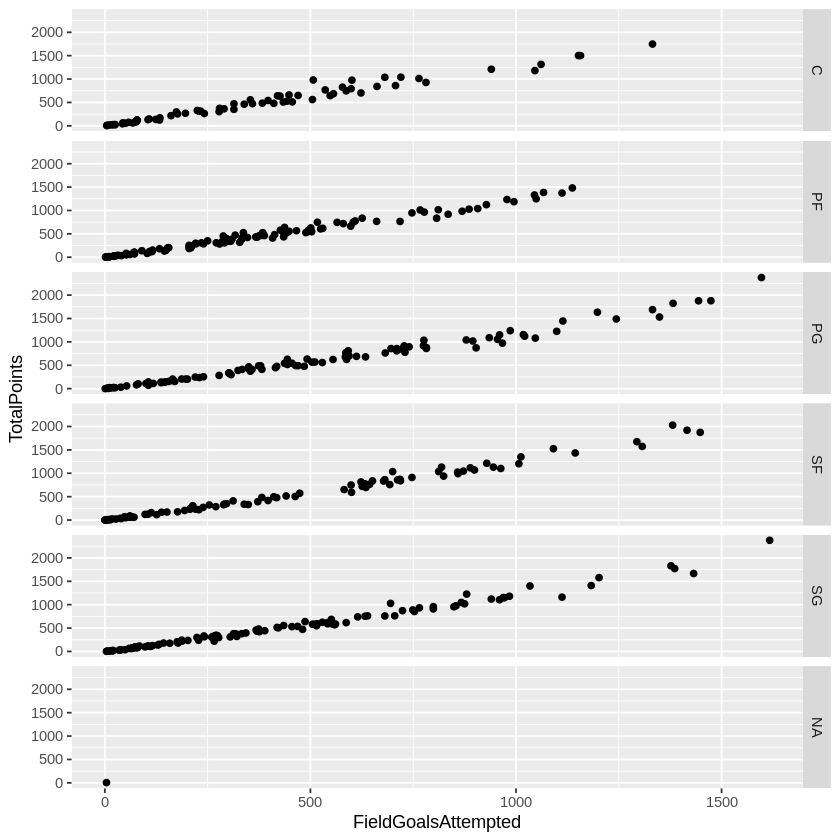

In [25]:
qplot(FieldGoalsAttempted, TotalPoints, data = NBA1516, facets = Position ~ .)

Warning message:
“Ignoring unknown parameters: binwidth”
Warning message:
“Ignoring unknown parameters: binwidth”


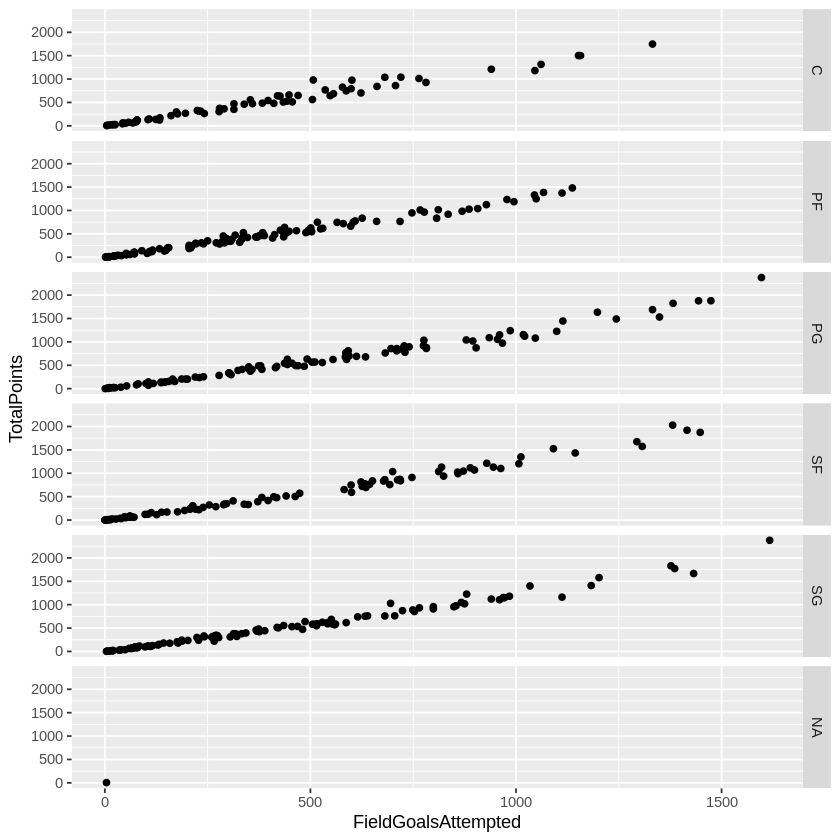

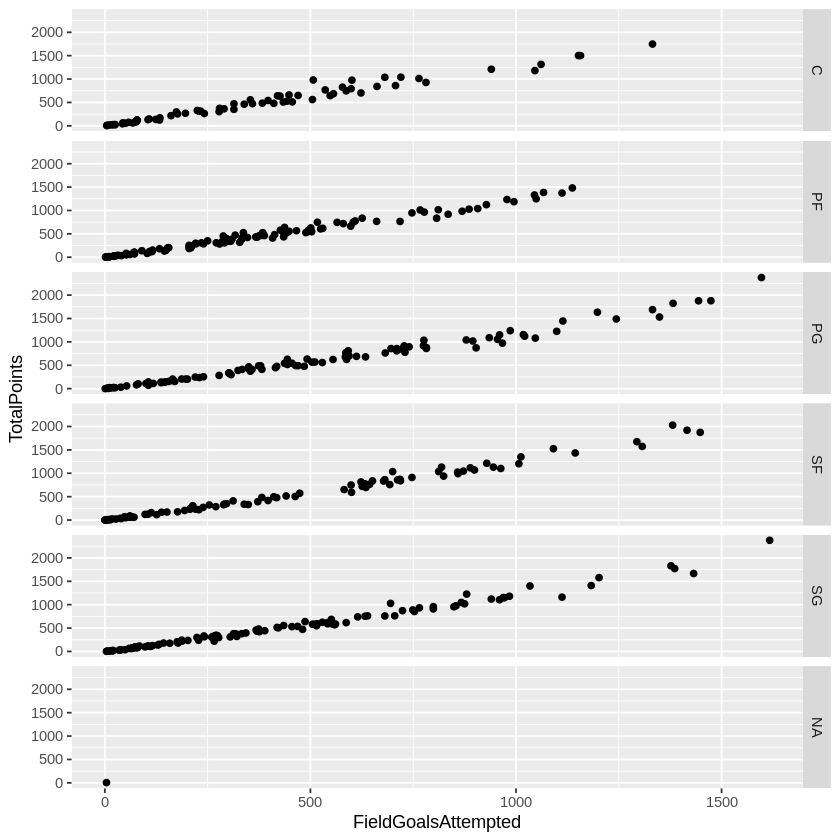

In [24]:
qplot(FieldGoalsAttempted, TotalPoints, data = NBA1516, facets = Position ~ .,binwidth=10)
qplot(FieldGoalsAttempted, TotalPoints, data = NBA1516, facets = Position ~ .,binwidth=100)

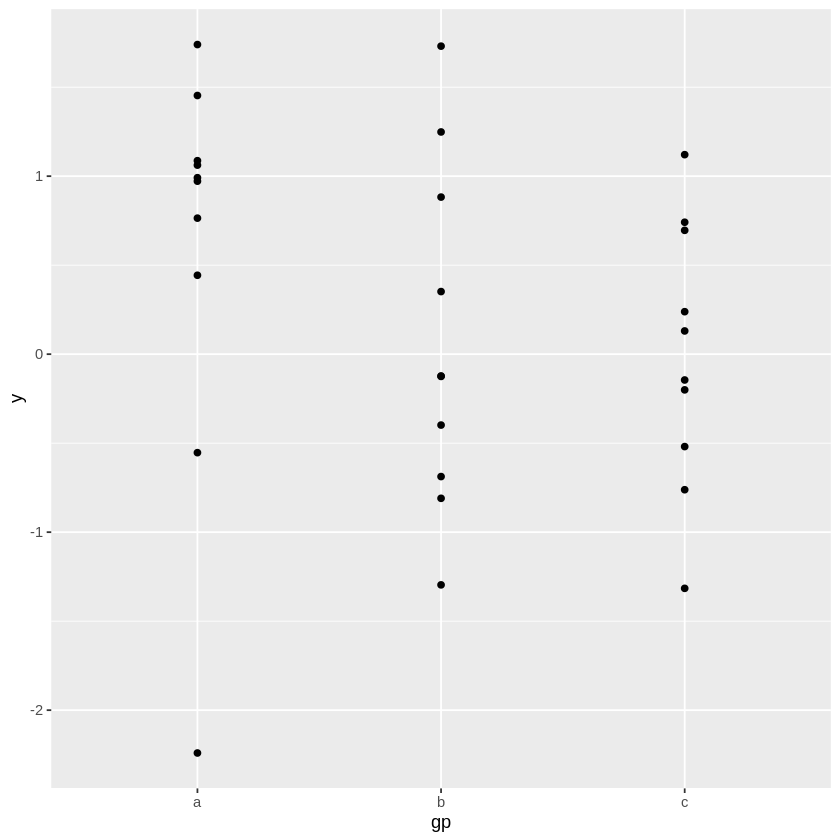

In [40]:
library(ggplot2)
df <- data.frame(gp=factor(rep(letters[1:3],each=10)),y=rnorm(30))
ggplot(df,aes(x=gp,y=y))+geom_point()

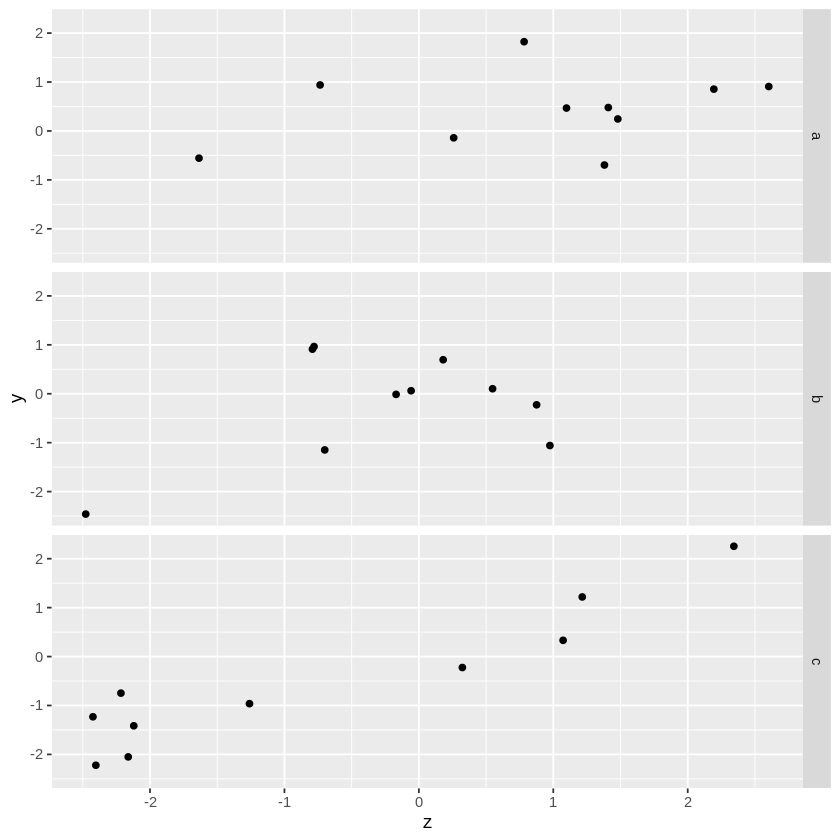

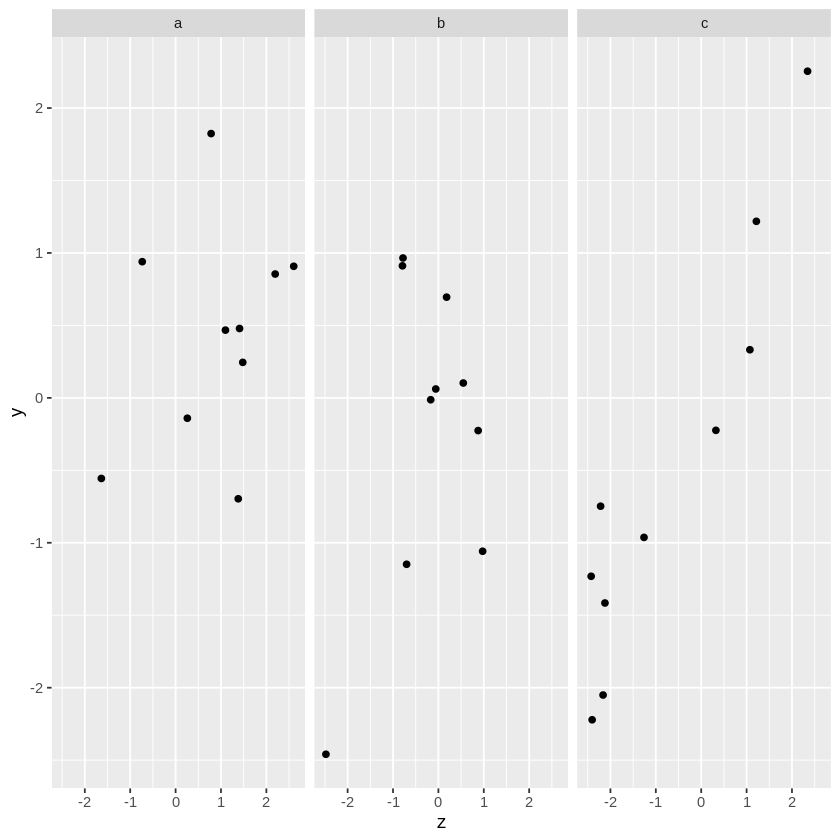

In [35]:
df$z<-df$y+rnorm(30)
ggplot(df,aes(x=z,y=y))+geom_point()+facet_grid(gp~.)
ggplot(df,aes(x=z,y=y))+geom_point()+facet_grid(.~gp)

`geom_smooth()` using method = 'loess' and formula 'y ~ x'

`geom_smooth()` using method = 'loess' and formula 'y ~ x'



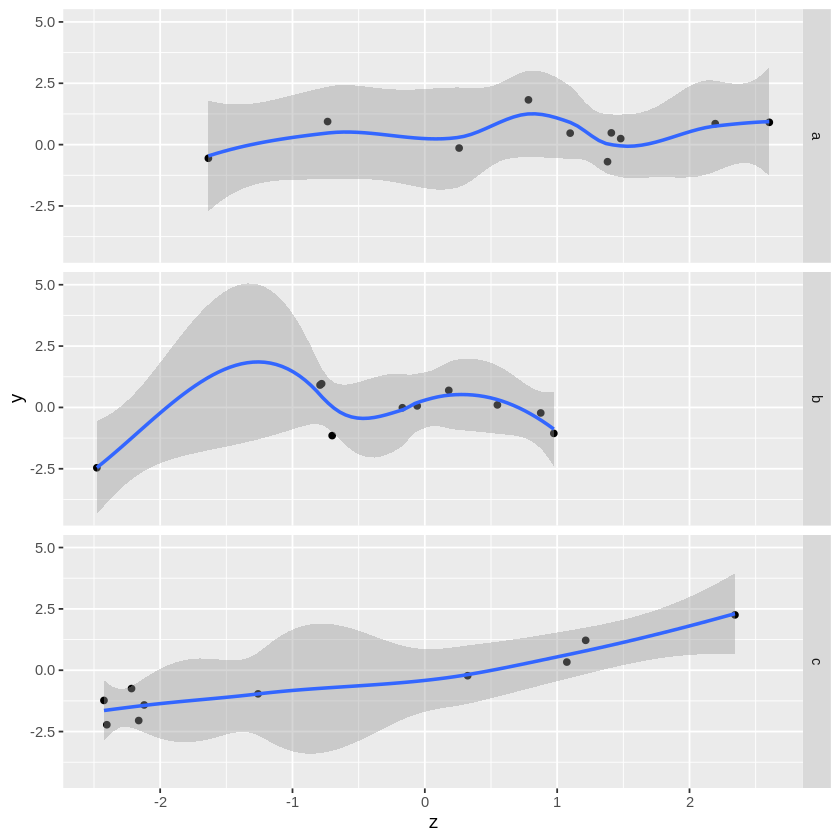

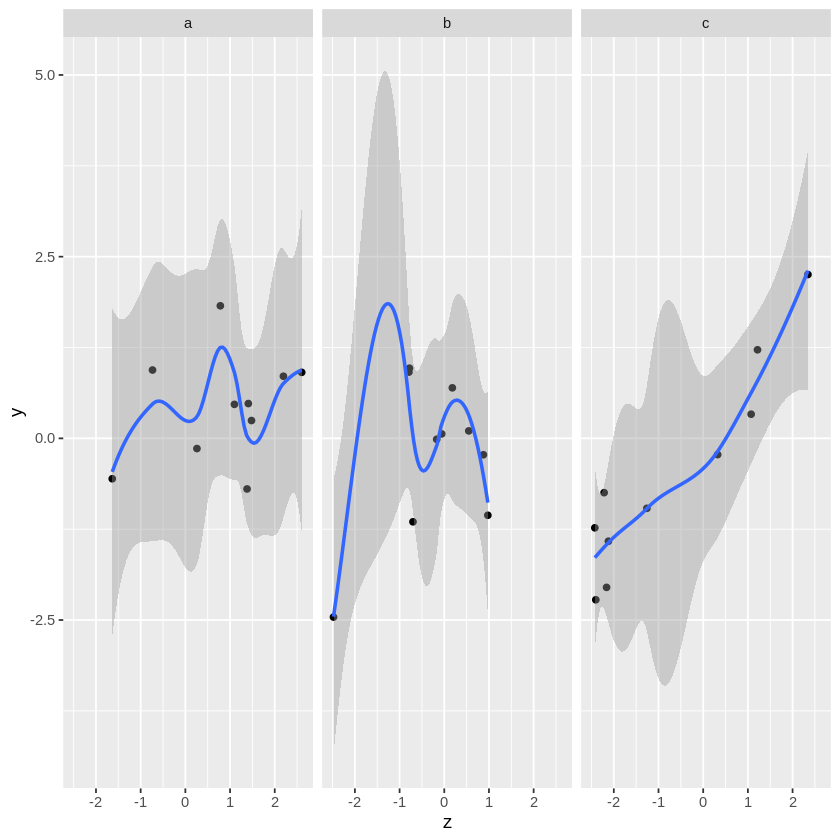

In [36]:
ggplot(df,aes(x=z,y=y))+geom_point()+facet_grid(gp~.)+geom_smooth()
ggplot(df,aes(x=z,y=y))+geom_point()+facet_grid(.~gp)+geom_smooth()

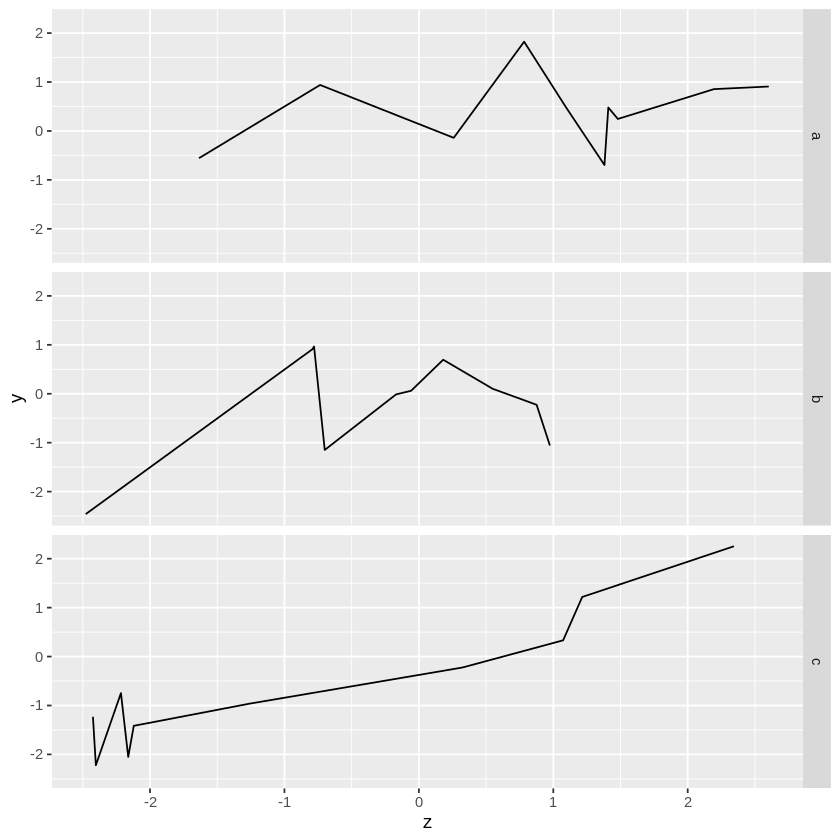

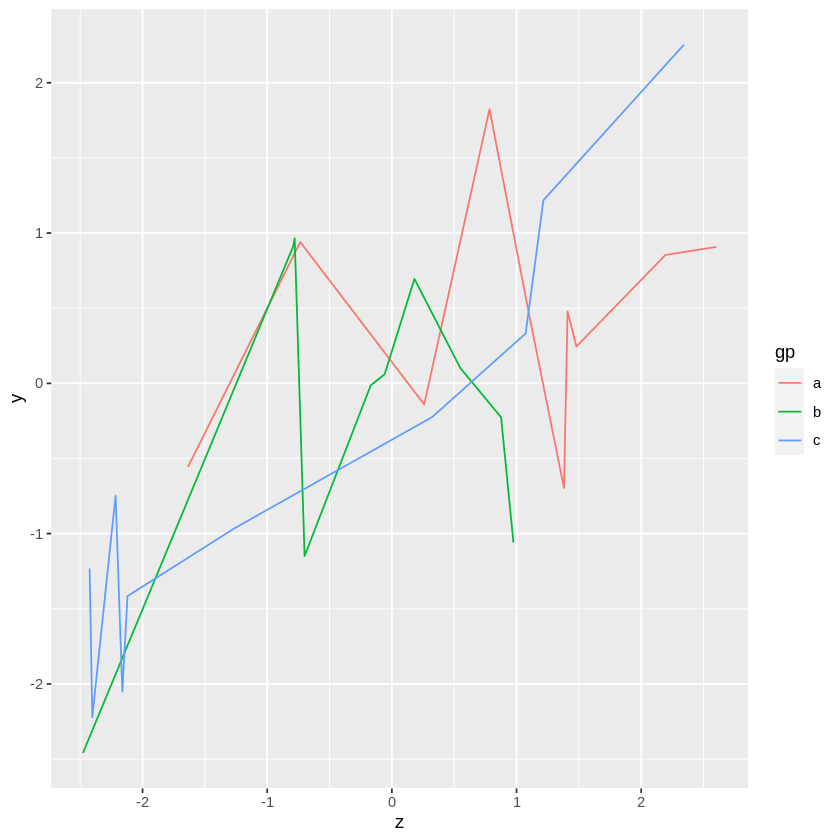

In [38]:
ggplot(df,aes(x=z,y=y))+geom_line()+facet_grid(gp~.)
ggplot(df,aes(x=z,y=y,color=gp))+geom_line()

In [44]:
install.packages("datasets")
install.packages("data.table")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Warning message:
“package ‘datasets’ is a base package, and should not be updated”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



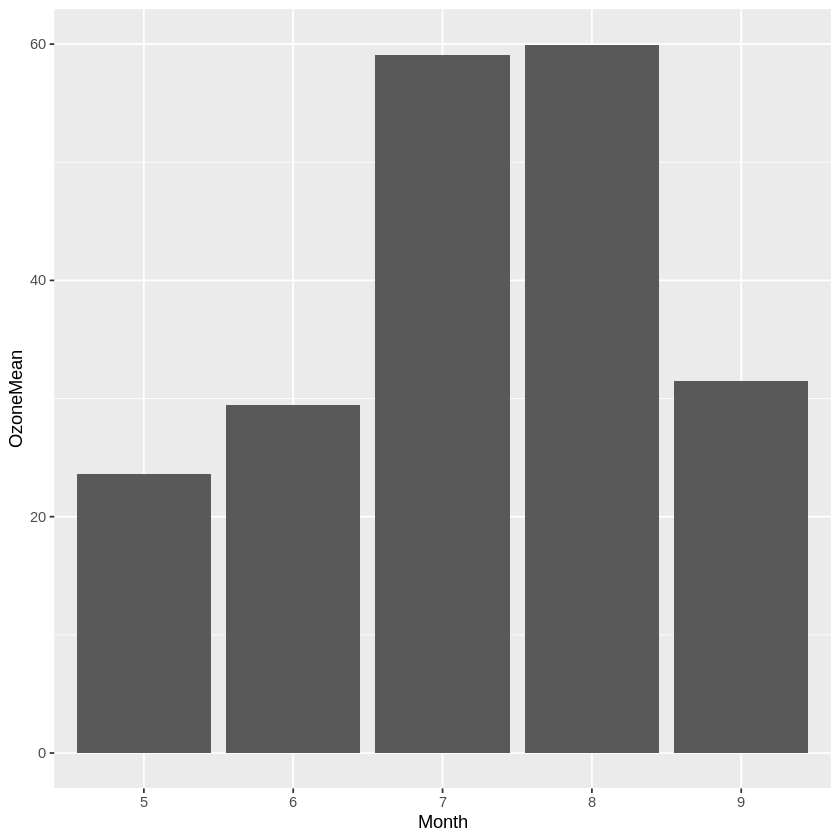

In [51]:
library(datasets)
library(data.table)
airquality$Month<-as.factor(airquality$Month)
airquality.mean<-data.table(airquality)[,.(OzoneMean=mean(Ozone,na.rm=T)),by=Month]
ggplot()+geom_bar(data=airquality.mean,aes(x=Month,y=OzoneMean),stat="identity")

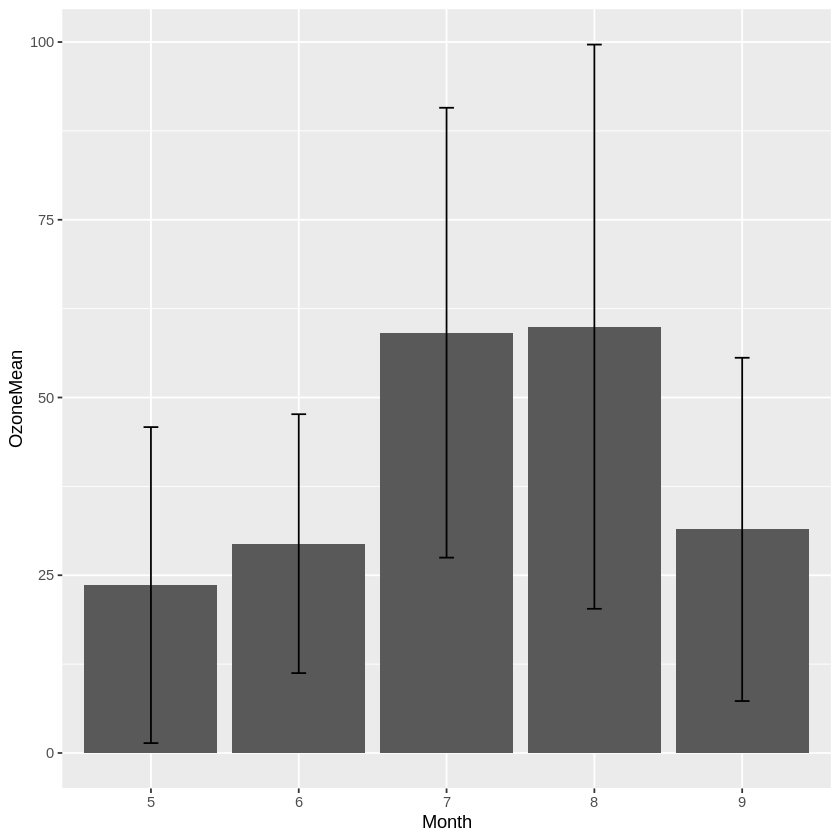

In [54]:
library(datasets)
library(data.table)
airquality$Month<-as.factor(airquality$Month)
airquality.stat<-data.table(airquality)[,.(OzoneMean=mean(Ozone,na.rm=T),OzoneSD=sd(Ozone,na.rm=T)),by=Month]
ggplot(data=airquality.stat)+
geom_bar(aes(x=Month,y=OzoneMean),stat="identity")+
geom_errorbar(aes(x=Month,ymin=OzoneMean-OzoneSD,ymax=OzoneMean+OzoneSD),width=.1)